In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleaned_hotel_bookings.csv")

### Korrelációs mátrix és jelleg megállapítás

Korrelációs mátrix azt mutatja meg hogy két vagy több(jelen esetben kettő) numerikus változó mennyire függ egymástól. Tehát ha az egyik változik valamennyivel mennyivel fog változni a másik.
Ez a mátrix fontos a jelleg megállapításhoz. Ugyanis a modelt elég lehet csak azokkal a változókkal tanítani amik a legjobban befolyásolják a kimenetelt. Ezzel is csökkentve a szükséges adatokat valamint a tanítási időt.

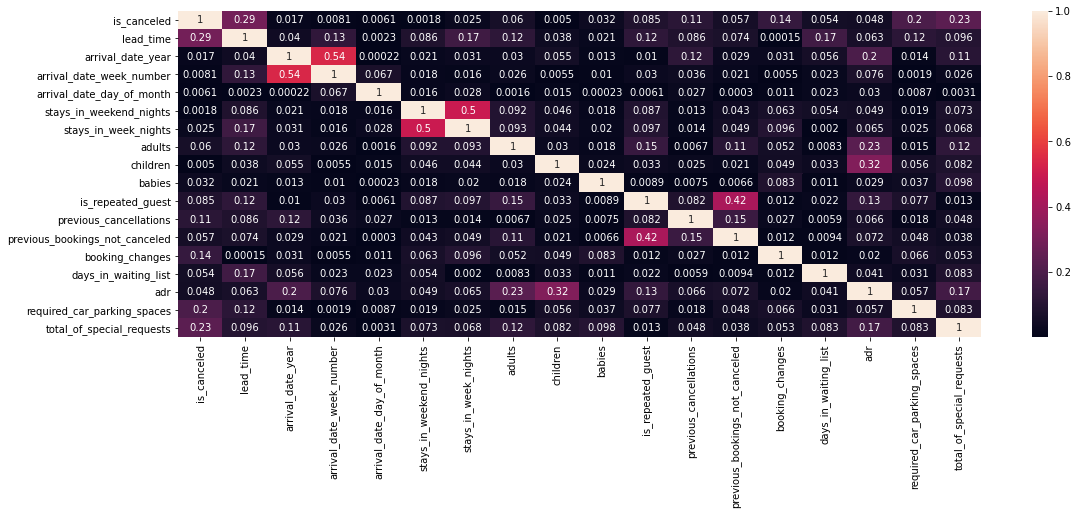

In [3]:
plt.figure(figsize=(18,6))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

Ezt a fajta korrelációs mátrixot a következő féleképpen kell leolvasni: A korrelációs együttható minél közelebb van 1-hez annál jobban befolyásolja a két változó egymást és minél közelebb 0-hoz annál kevésbé.
Ez alapján meg tudjuk állapítani, hogy az 5 legfontosabb numerikus változó:
- lead_time
- total_of_special_requests
- required_car_parking_spaces
- booking_changes
- previos_cancellations

Ezeket a változókat mindenféleképpen használni kell majd a model építésénél. Vannak azonban olyanok is amiket ki kell venni, hogy ne rontsa a pontosságot.

Ilyen változó a arrival_date_year ugyanis évek nem fognak ismétlődni a jövőben, tehát a model semmi információt nem tud kiszedni abból, hogy egy adott foglalásnál látja hogy 2016-ban történt ha már 2020-at írunk. A booking_changes is ki lehetne venni hiszen ez a változó pedig folyamatosan változhat a foglalás pillanatától kezdve, de én ezt inkább benne hagyom hiszen hogyha egy foglalásnál a vendég módosit valamit akkor a model újra tudja kalkulálni, hogy le lesz-e mondva vagy sem. Valamint a days_in_waiting_list is elhagyható hiszen a modelünket arra az esetre akarjuk tanítani ha már a vendég be is foglalta a szállást, azonban amíg váró listában van ez nem történik meg.

### Miután megnéztük melyek lehetnek a numerikus változók amikre szükségünk lehet és amikre nem nézzük meg a kategorikus változókat is

In [4]:
data.select_dtypes(exclude=['int64', 'float64']).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

A reservation_status változót mindenféleképpen el kell hagyni hiszen ebből a bemenetből a model rögtön meg is mondhatja a kimenetet hiszen ebben van eltárolva a foglalás állapota, hogy Check-Out(megérkezett a vendég) vagy Canceled(lemondta a foglalást) és ha ezt a változót töröljük akkor a reservation_status_date-ra sincs szükség, hogy a foglalás állapota mikor változott.

Dummy változók(szakdogában beszélni a dummy változókról) és ehhez korrelációs mátrix

In [5]:
cat_var=data[['is_canceled', 'hotel', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type']]
cat_corr = pd.get_dummies(cat_var)
cat_corr.corr().abs().sort_values(ascending=False, by="is_canceled").head(10)

,is_canceled,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,...,company_92.0,company_93.0,company_94.0,company_96.0,company_99.0,company_None,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.136531,0.136531,0.013124,0.038828,0.019845,0.001282,0.025896,0.013946,0.039306,...,0.008004,0.000385,0.011715,0.002220,0.005960,0.099310,0.023670,0.038698,0.133084,0.124135
deposit_type_Non Refund,0.481457,0.172003,0.172003,0.070516,0.061678,0.004788,0.116217,0.001343,0.016639,0.029523,...,0.003893,0.001870,0.010075,0.001080,0.003740,0.035813,0.006478,0.025999,0.115867,0.121451
deposit_type_No Deposit,0.477911,0.166464,0.166464,0.071990,0.061048,0.006062,0.116600,0.000927,0.016744,0.029710,...,0.003918,0.001882,0.010138,0.001087,0.003764,0.026220,0.005953,0.023227,0.109341,0.114761
market_segment_Groups,0.221859,0.038688,0.038688,0.002501,0.097424,0.050170,0.136903,0.138797,0.019893,0.035297,...,0.004655,0.002236,0.012045,0.001291,0.004472,0.025568,0.007272,0.025889,0.335266,0.357037
assigned_room_type_A,0.197187,0.285157,0.285157,0.112068,0.013351,0.032150,0.191709,0.017162,0.008531,0.036617,...,0.003413,0.000479,0.005732,0.003699,0.004206,0.006039,0.002549,0.019384,0.100019,0.108329
agent_1.0,0.190736,0.175876,0.175876,0.076255,0.020767,0.016198,0.078858,0.025174,0.011291,0.019139,...,0.002642,0.001269,0.006837,0.000733,0.002538,0.062202,0.088116,0.016627,0.188977,0.164166
distribution_channel_TA/TO,0.175944,0.180630,0.180630,0.101940,0.027320,0.051351,0.107151,0.024185,0.090214,0.147148,...,0.022254,0.010690,0.057589,0.006172,0.021381,0.438489,0.082640,0.013509,0.027260,0.005581
market_segment_Direct,0.154390,0.131794,0.131794,0.073109,0.003097,0.025402,0.072625,0.013959,0.015323,0.027190,...,0.000973,0.001722,0.009278,0.000994,0.003445,0.059952,0.062496,0.028720,0.118055,0.102356
distribution_channel_Direct,0.151620,0.159572,0.159572,0.047908,0.030117,0.007912,0.081548,0.033606,0.016676,0.157416,...,0.003439,0.001874,0.010097,0.001082,0.003749,0.003279,0.067628,0.016649,0.079700,0.057303
hotel_Resort Hotel,0.136531,1.000000,1.000000,0.041029,0.105856,0.173593,0.217039,0.139934,0.031693,0.010896,...,0.014685,0.003562,0.038001,0.002057,0.014109,0.063338,0.039890,0.023121,0.005754,0.027812


Az 5 legfontosabb kategorikus változó:
- deposit_type
- market_segment
- assigned_room_type
- agent
- distribution_channel

Vizsgáljuk meg ezeket a változókat, hogy milyen összefüggésben vannak a lemondásokkal

### deposit_type

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


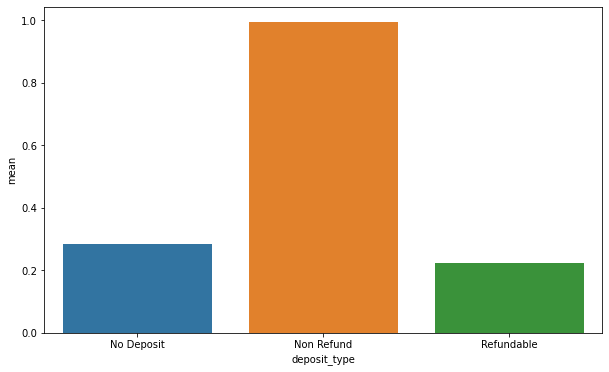

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.groupby("deposit_type")["is_canceled"].describe().index, y=data.groupby("deposit_type")["is_canceled"].describe()["mean"])
data.groupby("deposit_type")["is_canceled"].describe()

Mint láthatjuk a foglalások nagy többsége No Deposit-tal történt. Azonban ha jobban megvizsgáljuk az adatokat a Non Refund-nál észrevehetjük azt, hogy a lemondás átlaga nagyon magas 0.99 míg a másik két eset nem tér el nagyban egymástól. Nézzük meg jobban ezt a változót ugyanis a kategorikus változóknál ez befolyásolja legjobban az is_canceled változót így ha valami baj van vele az azt jelenti, hogy pontatalan lesz a modelünk ha ezeket az adatokat is belevesszük.

Hasonlítsuk össze a változó három esetének az összes többi változóval való átlagát.

In [7]:
data.groupby("deposit_type").mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,
No Deposit,0.283770,88.756615,2016.174014,27.135310,15.814652,0.970165,2.556799,1.862597,0.118395,0.009069,0.035760,0.042039,0.154911,0.249634,1.519347,103.526101,0.071129,0.651427
Non Refund,0.993624,212.908891,2016.031466,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,7.992253,89.964017,0.000069,0.001782
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,9.586420,76.209753,0.123457,0.141975


A previous_cancellations, az is_repeated_guest, a booking_changes required_car_parking_spaces és a total_of_special_requests átlagjai nagyon eltérnek a Non Refund esetnél a másik kettőhöz képest. Ezek alapján az adatok alapján Non Refund-al olyan emberek foglaltak szállást akik szinte minden esetben lemondják a foglalást, az esetek majdnem felében mondtak már le foglalást, parkolóhelyre nincs szükségük, nagyon ritkán kérik hogy változtassanak valamit a foglalásban és kevés különleges kérésük van. Ezzel abban az esetben ha az deposit_type(Előleg típusa) más lenne mint Non Refund(Nem visszatérithető) nem lenne gond, viszont valószínűtlennek tartom, hogy az emberekek akik így foglalnak szállást hatalmas arányban mondják le, így hagyják veszni a pénzüket ezért inkább kiveszem a deposit_type-ot is a jelleg változók közül ugyanis ezek miatt lehetnek benne valótlan adatok.

### market_segment

,count,mean,std,min,25%,50%,75%,max
market_segment,,,,,,,,
Aviation,237.0,0.219409,0.414722,0.0,0.0,0.0,0.0,1.0
Complementary,743.0,0.130552,0.337136,0.0,0.0,0.0,0.0,1.0
Corporate,5295.0,0.187347,0.390226,0.0,0.0,0.0,0.0,1.0
Direct,12606.0,0.153419,0.360405,0.0,0.0,0.0,0.0,1.0
Groups,19811.0,0.610620,0.487622,0.0,0.0,1.0,1.0,1.0
Offline TA/TO,24219.0,0.343160,0.474774,0.0,0.0,0.0,1.0,1.0
Online TA,56477.0,0.367211,0.482049,0.0,0.0,0.0,1.0,1.0
Undefined,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


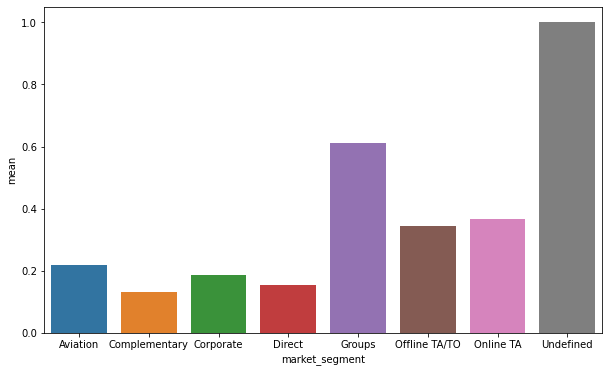

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.groupby("market_segment")["is_canceled"].describe().index, y=data.groupby("market_segment")["is_canceled"].describe()["mean"])
data.groupby("market_segment")["is_canceled"].describe()

### assigned_room_type

,count,mean,std,min,25%,50%,75%,max
assigned_room_type,,,,,,,,
A,74053.0,0.444925,0.496961,0.0,0.0,0.0,1.0,1.0
B,2163.0,0.236708,0.425160,0.0,0.0,0.0,0.0,1.0
C,2375.0,0.187789,0.390626,0.0,0.0,0.0,0.0,1.0
D,25322.0,0.251244,0.433737,0.0,0.0,0.0,1.0,1.0
E,7806.0,0.252114,0.434254,0.0,0.0,0.0,1.0,1.0
F,3751.0,0.247134,0.431403,0.0,0.0,0.0,0.0,1.0
G,2553.0,0.305523,0.460719,0.0,0.0,0.0,1.0,1.0
H,712.0,0.352528,0.478093,0.0,0.0,0.0,1.0,1.0
I,363.0,0.013774,0.116713,0.0,0.0,0.0,0.0,1.0


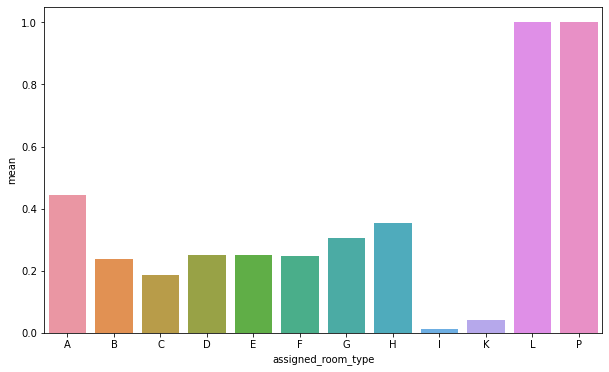

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.groupby("assigned_room_type")["is_canceled"].describe().index, y=data.groupby("assigned_room_type")["is_canceled"].describe()["mean"])
data.groupby("assigned_room_type")["is_canceled"].describe()

### agent

In [10]:
data.groupby("agent")["is_canceled"].describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
1.0,7191.0,0.734251,0.441762,0.0,0.0,1.0,1.00,1.0
10.0,260.0,0.246154,0.431600,0.0,0.0,0.0,0.00,1.0
103.0,21.0,0.095238,0.300793,0.0,0.0,0.0,0.00,1.0
104.0,53.0,0.094340,0.295098,0.0,0.0,0.0,0.00,1.0
105.0,14.0,0.285714,0.468807,0.0,0.0,0.0,0.75,1.0
...,...,...,...,...,...,...,...,...
95.0,135.0,0.140741,0.349049,0.0,0.0,0.0,0.00,1.0
96.0,537.0,0.454376,0.498378,0.0,0.0,0.0,1.00,1.0
98.0,124.0,0.491935,0.501963,0.0,0.0,0.0,1.00,1.0


### distribution_channel

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,6677.0,0.220758,0.414789,0.0,0.0,0.0,0.0,1.0
Direct,14645.0,0.174599,0.379637,0.0,0.0,0.0,0.0,1.0
GDS,193.0,0.191710,0.394670,0.0,0.0,0.0,0.0,1.0
TA/TO,97870.0,0.410259,0.491883,0.0,0.0,0.0,1.0,1.0
Undefined,5.0,0.800000,0.447214,0.0,1.0,1.0,1.0,1.0


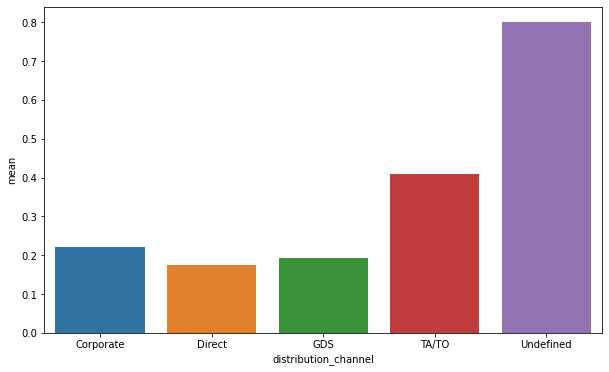

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data.groupby("distribution_channel")["is_canceled"].describe().index, y=data.groupby("distribution_channel")["is_canceled"].describe()["mean"])
data.groupby("distribution_channel")["is_canceled"].describe()

A maradék 4 legnagyobb korrelációval rendelkező változóban nem találtam különösebb rendelleneséget. Egyedül az assigned_room_type változónál az L és P típusú szobáknak 100%-os a lemondási arányuk azonban láthatjuk, hogy a kettőből összesen 13 sornyi adat ár rendelkezésre ami töredéke az összes adatnak.

Egy olyan vizsgálatot csinálok a szoba típusokkal, hogy azok nagyobb arányba mondják-e le a foglalásokat akiknek más szobát adtak(assigned_room_type) mint amilyet lefoglaltak(reserved_room_type) mint azok akik olyan szobát kaptak mint amilyet foglaltak.

In [34]:
data["same_room_type"] = data.apply(lambda x: 1 if x["reserved_room_type"]==x["assigned_room_type"] else 0, axis = 1)

In [37]:
data.groupby("same_room_type")["is_canceled"].describe()

,count,mean,std,min,25%,50%,75%,max
same_room_type,,,,,,,,
0,14917.0,0.053764,0.225559,0.0,0.0,0.0,0.0,1.0
1,104473.0,0.415629,0.492832,0.0,0.0,0.0,1.0,1.0


Láthatjuk, hogy csupán a foglalások körülbelül tizedénél történik olyan, hogy valakinek másfajta szobát adnak mint amilyet kért és ebben az esetben nem nagyobb a foglalások lemondásának aránya mintha azt a szobát kapta volna amelyiket akarja.